In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Grassberger_Procaccia(data: np.array, k: int, ln_ls: np.array) -> np.array:
    omegas = data[np.arange(len(data) + 1 - k)[:, None] + np.arange(k)]
    ros = np.linalg.norm(omegas[:, None] - omegas, axis=2)
    return np.log((ros[None] - np.exp(ln_ls)[:, None, None] < 0).mean(axis=(1, 2)))

In [3]:
def get_ts_sin(T: float, N: int):
    return np.array(np.sin(np.linspace(0, T, N + 1)))

In [4]:
T = 1.0
N = 1000

data_sin = get_ts_sin(T, N)

ks = range(1, 8)
ln_ls = np.arange(-8, 1.5, 0.1)

ln_Cs_sin = {}
for i in ks:
    ln_Cs_sin[i] = Grassberger_Procaccia(data_sin, i, ln_ls)

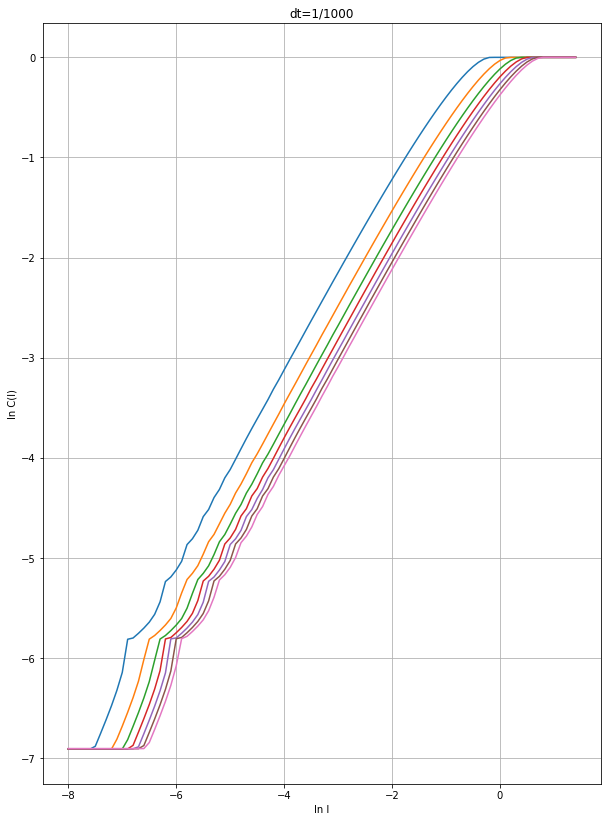

In [5]:
plt.figure(figsize=(10, 14))

for i in ks:
    plt.plot(ln_ls, ln_Cs_sin[i], label=i)
    
plt.title('dt=1/1000')
plt.xlabel('ln l')
plt.ylabel('ln C(l)')
plt.grid()
plt.show()

In [6]:
def get_ts_cos(T, N):
    return np.array(np.cos(np.linspace(0, T, N + 1)))

In [7]:
T = 1.0
N = 1000

data_cos = get_ts_cos(T, N)

ks = range(1, 8)
ln_ls = np.arange(-11, 1, 0.1)

ln_Cs_cos = {}
for i in ks:
    ln_Cs_cos[i] = Grassberger_Procaccia(data_cos, i, ln_ls)

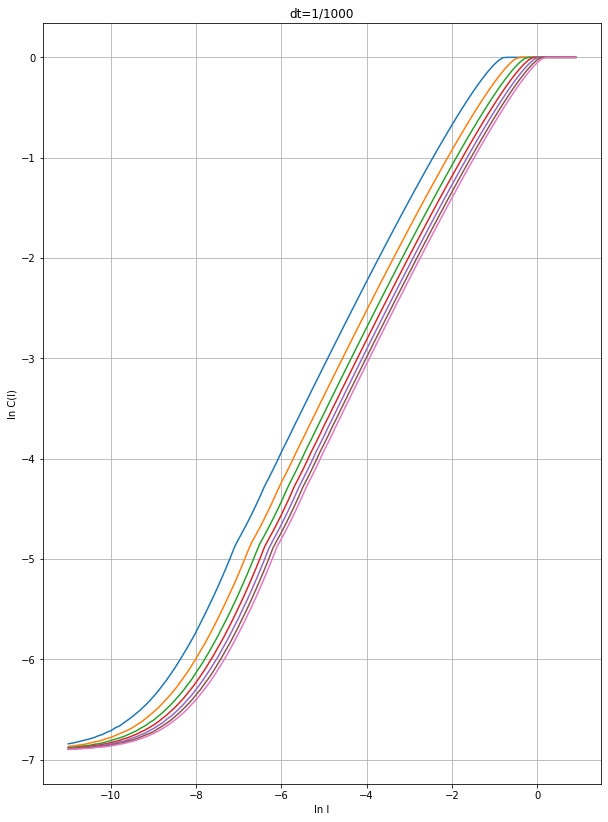

In [8]:
plt.figure(figsize=(10, 14))

for i in ks:
    plt.plot(ln_ls, ln_Cs_cos[i], label=i)
    
plt.title('dt=1/1000')
plt.xlabel('ln l')
plt.ylabel('ln C(l)')
plt.grid()
plt.show()

In [ ]:
# видно что достаточно двух точек для определения следующей
# тангенс угла наклона начиная со второго не меняется